In [0]:
# Code taken from documentation on https://scikit-learn.org
# Code taken from https://github.com/itdxer/neupy/blob/master/examples/competitive/sofm_basic.py
# Code taken from https://github.com/itdxer/neupy/blob/master/examples/competitive/sofm_iris_clustering.py
# Code taken from # code taken from https://github.com/itdxer/neupy/blob/master/examples/competitive/sofm_heatmap_visualization.py

# Sources used in previous Assignments that may be used again now:
# Code taken from https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
# Code taken from https://stackoverflow.com/questions/49754797/how-to-draw-2d-random-uniform-samples-from-two-ranges

In [1]:
!pip install sklearn
!pip install neupy

     |████████████████████████████████| 235kB 2.8MB/s 
     |████████████████████████████████| 92.6MB 1.5MB/s 
     |████████████████████████████████| 368kB 58.7MB/s 
     |████████████████████████████████| 3.2MB 46.3MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0
  Found existing installation: progressbar2 3.38.0
    Uninstalling progressbar2-3.38.0:
      Successfully uninstalled progressbar2-3.38.0
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [2]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import seaborn as sns

from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles)

from sklearn.preprocessing import StandardScaler

from neupy import algorithms, utils


from sklearn.cluster import AgglomerativeClustering

# from sklearn.model_selection import train_test_split,LeaveOneOut,cross_val_score

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
#plt.rcParams['figure.figsize'] = [9.5, 6] #width then height
#sns.set_context('notebook')


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [0]:
#---------------------------Generating data------------------------------#
np.random.seed(5)

def noise2D (size):
  return 0.3 * np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]], size=size)

# (1) Non-cluster data - uniformly distributed
xy_min = [-10, -10]
xy_max = [10, 10]
X1 = np.random.uniform(low=xy_min, high=xy_max, size=(750,2)) * 10 + noise2D(750)
y1 = np.repeat(0,750)
# [2D data, true labels]
data1 = [X1, y1]


# (2) Non-spherical data
data2 = make_circles(factor=0.5, noise=0.1, n_samples=750)

# (3) Many clusters, close to eachother
data3 = make_blobs(n_samples=800, n_features=2, 
                   centers=np.asarray([np.random.randint(10, size=2) for i in range(20)]),
                   cluster_std=0.4,
                   center_box=(-.4,.4))
                   

# (4) Different cluster sizes
X41 = np.random.multivariate_normal(mean=[-5, -3], cov=[[1, 0], [0, 1]], size=50) + noise2D(50)
X42 = np.random.multivariate_normal(mean=[-2.5, 6], cov=[[4.5, 0], [0, 4.5]], size=1000)+ noise2D(1000)
X43 = np.random.multivariate_normal(mean=[3, 0], cov=[[2, 0], [0, 2]], size=200)+ noise2D(200)
X4 = np.concatenate([X41, X42, X43])
y4 = np.repeat([0,1,2],repeats=[50,1000,200])
data4 = [X4, y4]

# (5) Different cluster densities
X51 = np.random.multivariate_normal(mean=[-4, 0], cov=[[1, 0], [0, 1]], size=250)+ noise2D(250)
X52 = np.random.multivariate_normal(mean=[3, 2], cov=[[3, 0], [0, 3]], size=250)+ noise2D(250)
X53 = np.random.multivariate_normal(mean=[0, -7], cov=[[2, 0], [0, 4]], size=250)+ noise2D(250)
X5 = np.concatenate([X51, X52, X53])
y5 = np.repeat([0,1,2],[250,250,250])
data5 = [X5, y5]

# (6) Easy-to-cluster data 2D 3-cluster data
centers = [[1, 1], [-1, -1], [1, -1]] 
X6, y6 = make_blobs(n_samples=750, centers=centers, cluster_std=0.4)
X6[:,0] = X6[:,0] *25
data6 = [X6, y6]

# (7) 3D 3-cluster data
centers = [[1, 1, 1], [-1, -1, -1], [1, -1, 0]] 
data7= make_blobs(n_samples=750,n_features=3, centers=centers, cluster_std=0.4)

# (8) 4D 3-cluster data
centers = [[1, 1, 1, 1], [-1, -1, -1, -1], [1, -1, 1, -1]] 
data8 = make_blobs(n_samples=750,n_features=4, centers=centers, cluster_std=0.4)

# (9) 5D 3-cluster data
centers = [[1, 1, 1, 1, 1], [-1, -1, -1, -1, -1], [1, -1, 1, -1, 0]] 
data9 = make_blobs(n_samples=750,n_features=5, centers=centers, cluster_std=0.4)

datasets = [data1, data2, data3, data4, data5, data6, data7, data8, data9]
dataDescriptions = ['Non-cluster data', 'Non-spherical data', 'Many clusters, close to eachother',
                   'Different cluster sizes', 'Different cluster densities', 'Easy-to-cluster data',
                   '3D 3-cluster data', '4D 3-cluster data', '5D 3-cluster data' ]

In [0]:
#----------------------------Preprocessing-------------------------------#
# Standard scaling of the data 
# [scaled data, true labels]
dataSc = [(StandardScaler().fit_transform(data[0]),
          data[1]) for data in datasets ]

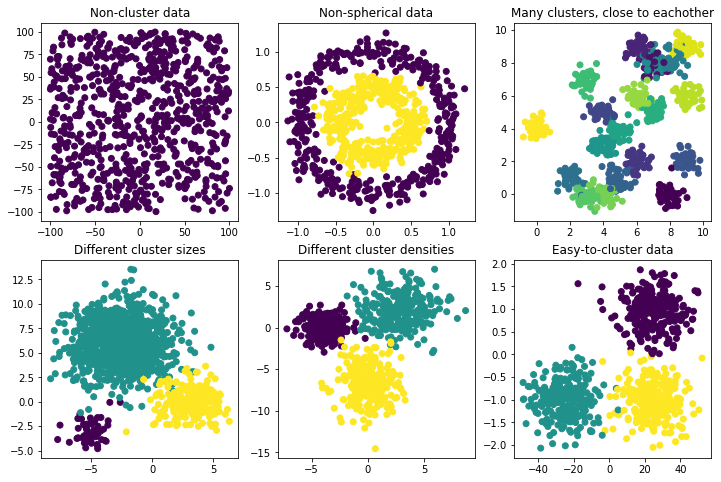

In [5]:
#----------------------------Visualizing data----------------------------#

fig, ax = plt.subplots(2, 3, figsize=(12,8))

# only 2D data is visualized
for i, data in enumerate(datasets[:6]):
  ax[0 if i < 3 else 1, np.mod(i,3)].scatter( data[0][:, 0], data[0][:, 1], 
                                             c=data[1])
  ax[0 if i < 3 else 1, np.mod(i,3)].title.set_text(dataDescriptions[i])
plt.show()

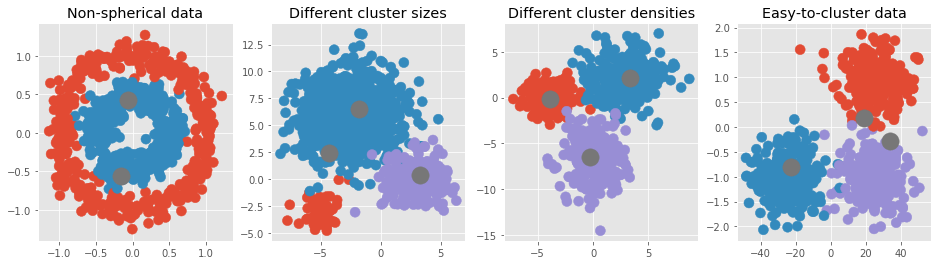

In [0]:
#------------------------------SOFM-----------------------------------#
plt.style.use('ggplot')
utils.reproducible()

ggplot_colors = plt.rcParams['axes.prop_cycle']
colors = np.array([c['color'] for c in ggplot_colors])

fig, ax = plt.subplots(1, 4, figsize=(16,4))

for axj, i in enumerate([1,3,4,5]):
  if i == 1:
    k=2 
  else: 
    k=3
    
  data, target = datasets[i]

  sofm = algorithms.SOFM(
    # Use only two features for the input
    n_inputs=2,
    # Number of outputs defines number of features
    # in the SOFM or in terms of clustering - number
    # of clusters
    n_outputs=k,
    # In clustering application we will prefer that
    # clusters will be updated independently from each
    # other. For this reason we set up learning radius
    # equal to zero
    learning_radius=0,
    # Training step size or learning rate
    step=0.25,
    # Shuffles dataset before every training epoch.
    shuffle_data=True,
    # Instead of generating random weights
    # (features / cluster centers) SOFM will sample
    # them from the data. Which means that after
    # initialization step 3 random data samples will
    # become cluster centers
    weight='sample_from_data',
    # Does not show training progress in terminal
    verbose=False,
    )
  sofm.train(data, epochs=300)

  ax[axj].scatter(*data.T, c=colors[target], s=100, alpha=1)
  cluster_centers = ax[axj].scatter(*sofm.weight, s=300, c=colors[3])
  ax[axj].title.set_text(dataDescriptions[i])

plt.show()

Bad performance on Non-spherical data set can be explained by the setting: weight='sample_from_data'.
For this dataset, the cluster centers won't be found when random data samples become cluster centers. Intersting to check whether performance is better when 
weight='init_pca' is used, or the default.

The distance used is 'euclid'. Interesting to see that performace is best on the dataset 'Different cluster densities'. Of the spherical datasets, set for which the components of the cluster centers are (roughly) within the same range. Let's see what the performance is when data is scaled.

/usr/local/lib/python3.6/dist-packages/neupy/algorithms/competitive/sofm.py:135: RuntimeWarning: invalid value encountered in true_divide
  coord = 2 * (coord / maximum - 0.5)


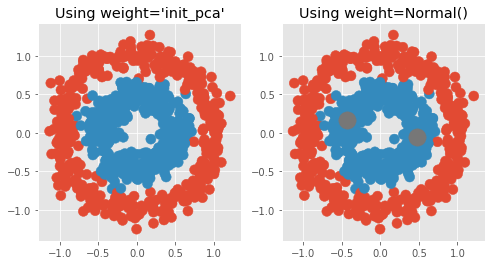

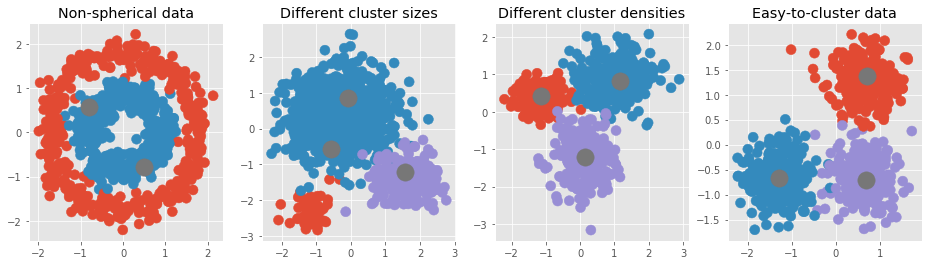

In [0]:
#------different weight measures for non-spherical data------#
fig, ax = plt.subplots(1, 2, figsize=(8,4))

data, target = datasets[1]

sofm0 = algorithms.SOFM(
    n_inputs=2,
    n_outputs=2,
    learning_radius=0,
    step=0.25,
    shuffle_data=True,
    weight='init_pca',
    )
sofm1 = algorithms.SOFM(
    n_inputs=2,
    n_outputs=2,
    learning_radius=0,
    step=0.25,
    shuffle_data=True,
    )
sofm0.train(data, epochs=300)
sofm1.train(data, epochs=300)

ax[0].scatter(*data.T, c=colors[target], s=100, alpha=1)
ax[0].scatter(*sofm0.weight, s=300, c=colors[3])
ax[0].title.set_text('Using weight=\'init_pca\'')
ax[1].scatter(*data.T, c=colors[target], s=100, alpha=1)
ax[1].scatter(*sofm1.weight, s=300, c=colors[3])
ax[1].title.set_text('Using weight=Normal()')

plt.show()

#---------------------Using scaled data-----------------------#
fig, ax = plt.subplots(1, 4, figsize=(16,4))

for axj, i in enumerate([1,3,4,5]):
  if i == 1:
    k=2 
  else: 
    k=3
  data, target = dataSc[i]

  sofm = algorithms.SOFM(
    n_inputs=2,
    n_outputs=k,
    learning_radius=0,
    step=0.25,
    shuffle_data=True,
    weight='sample_from_data',
    verbose=False,
    )
  sofm.train(data, epochs=300)

  ax[axj].scatter(*data.T, c=colors[target], s=100, alpha=1)
  cluster_centers = ax[axj].scatter(*sofm.weight, s=300, c=colors[3])
  ax[axj].title.set_text(dataDescriptions[i])

plt.show()

Something is going wrong when using the init_pca method: "*/usr/local/lib/python3.6/dist-packages/neupy/algorithms/competitive/sofm.py:135: RuntimeWarning: invalid value encountered in true_divide coord = 2 * (coord / maximum - 0.5) *" As this was just a side step out of curiosity, I won't pursue solving this error for now.

Interesting to see that for the "Easy-to-cluster" data, performance has increased, but for the "Different cluster sizes" not much has changed.

In [6]:
#--------------Training SOFM models on higher dimensional data-----------#

#"Train individual SOMs on the three new data-sets"
sofms_20x20 = [2,3,4,5]
clusters_20x20 = [None]*4

for i, data in enumerate(dataSc[5:]):

  d = sofms_20x20[i]

  sofm = algorithms.SOFM(
            n_inputs=d,
            features_grid=(20,20),
            learning_radius=5,
            reduce_radius_after=20,
            step=0.25,
            shuffle_data=True,
            verbose=False,)
  sofm.train(data[0])
  sofms_20x20[i] = sofm
  clusters_20x20[i] = sofm.predict(data[0]).argmax(axis=1)

In [0]:
# code taken from https://github.com/itdxer/neupy/blob/master/examples/competitive/sofm_heatmap_visualization.py

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing
from neupy import algorithms, utils, environment

from itertools import product

def iter_neighbours(weights, hexagon=False):
    _, grid_height, grid_width = weights.shape

    hexagon_even_actions = ((-1, 0), (0, -1), (1, 0), (0, 1), (1, 1), (-1, 1))
    hexagon_odd_actions = ((-1, 0), (0, -1), (1, 0), (0, 1), (-1, -1), (1, -1))
    rectangle_actions = ((-1, 0), (0, -1), (1, 0), (0, 1))

    for neuron_x, neuron_y in product(range(grid_height), range(grid_width)):
        neighbours = []

        if hexagon and neuron_x % 2 == 1:
            actions = hexagon_even_actions
        elif hexagon:
            actions = hexagon_odd_actions
        else:
            actions = rectangle_actions

        for shift_x, shift_y in actions:
            neigbour_x = neuron_x + shift_x
            neigbour_y = neuron_y + shift_y

            if 0 <= neigbour_x < grid_height and 0 <= neigbour_y < grid_width:
                neighbours.append((neigbour_x, neigbour_y))

        yield (neuron_x, neuron_y), neighbours

plt.style.use('ggplot')
utils.reproducible()

class_parameters = [
    dict(
        marker='o',
        markeredgecolor='#E24A33',
        markerfacecolor='None',
    ),
    dict(
        marker='s',
        markeredgecolor='#348ABD',
        markerfacecolor='None',
    ),
    dict(
        marker='v',
        markeredgecolor='g',
        markerfacecolor='None',
    )
]

def compute_heatmap(weight, hexagongrid=False):
    heatmap = np.zeros((GRID_HEIGHT, GRID_WIDTH))
    for (neuron_x, neuron_y), neighbours in iter_neighbours(weight, hexagon=hexagongrid):
        total_distance = 0

        for (neigbour_x, neigbour_y) in neighbours:
            neuron_vec = weight[:, neuron_x, neuron_y]
            neigbour_vec = weight[:, neigbour_x, neigbour_y]

            distance = np.linalg.norm(neuron_vec - neigbour_vec)
            total_distance += distance

        avg_distance = total_distance / len(neighbours)
        heatmap[neuron_x, neuron_y] = avg_distance

    return heatmap

def compute_heatmap_expanded(weight,hexagongrid=False):
    heatmap = np.zeros((2 * GRID_HEIGHT - 1, 2 * GRID_WIDTH - 1))
    for (neuron_x, neuron_y), neighbours in iter_neighbours(weight, hexagon=hexagongrid):
        for (neigbour_x, neigbour_y) in neighbours:
            neuron_vec = weight[:, neuron_x, neuron_y]
            neigbour_vec = weight[:, neigbour_x, neigbour_y]

            distance = np.linalg.norm(neuron_vec - neigbour_vec)

            if neuron_x == neigbour_x and (neigbour_y - neuron_y) == 1:
                heatmap[2 * neuron_x, 2 * neuron_y + 1] = distance

            elif (neigbour_x - neuron_x) == 1 and neigbour_y == neuron_y:
                heatmap[2 * neuron_x + 1, 2 * neuron_y] = distance

    return heatmap

GRID_HEIGHT = 20
GRID_WIDTH = 20

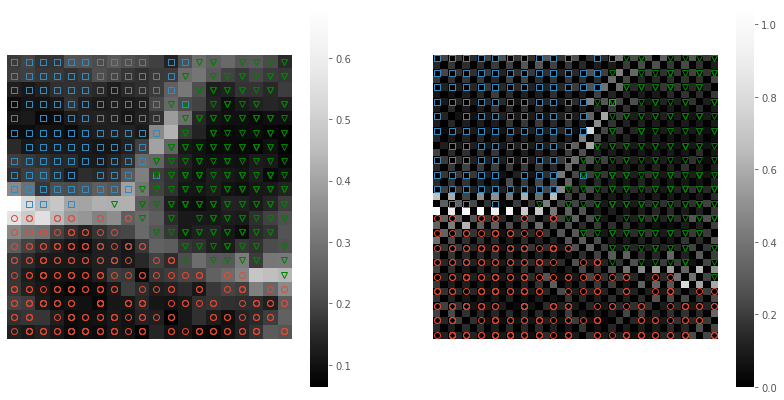

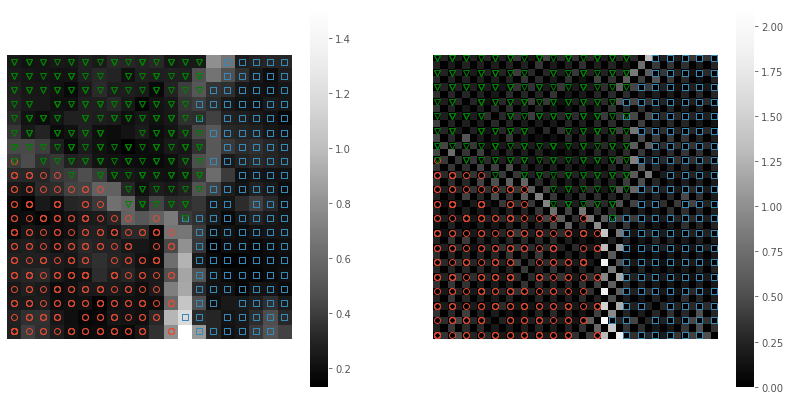

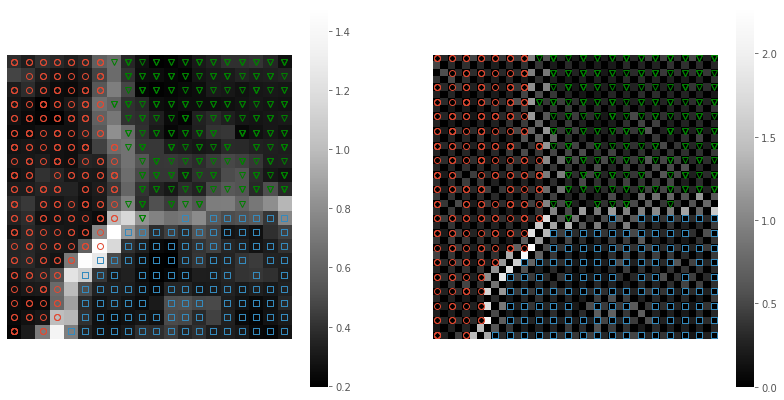

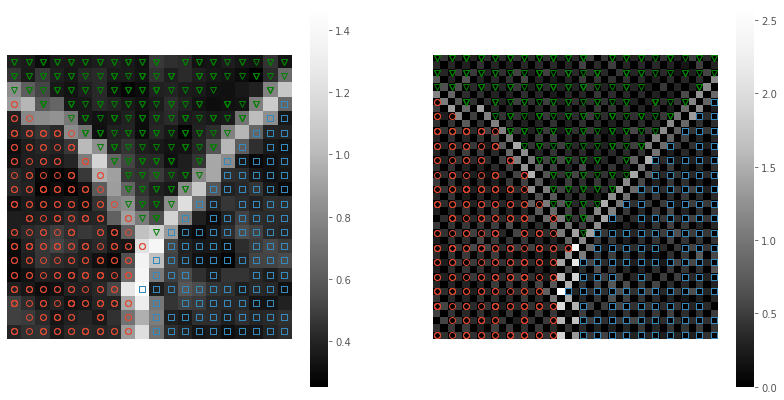

In [0]:
for sofm, clusters, target in zip(sofms_20x20, clusters_20x20, [data[1] for data in dataSc[5:]]):

  fig, ax = plt.subplots(1, 2, figsize=(14,7))

  for actual_class, cluster_index in zip(target, clusters):
    cluster_y, cluster_x = divmod(cluster_index, GRID_HEIGHT)
    parameters = class_parameters[actual_class]

    ax[0].plot(cluster_x, cluster_y, **parameters)
    ax[1].plot(2 * cluster_x, 2 * cluster_y, **parameters)

  weight = sofm.weight.reshape((sofm.n_inputs, GRID_HEIGHT, GRID_WIDTH))
  heatmap0 = compute_heatmap(weight)
  heatmap1 = compute_heatmap_expanded(weight)

  mappabl0 = ax[0].imshow(heatmap0, cmap='Greys_r', interpolation='nearest')
  mappabl1 = ax[1].imshow(heatmap1, cmap='Greys_r', interpolation='nearest')

  ax[0].axis('off')
  ax[1].axis('off')
  
  plt.colorbar(mappabl0, ax=ax[0])
  plt.colorbar(mappabl1, ax=ax[1])
  plt.show()

Source: http://neupy.com/2017/12/09/sofm_applications.html#sofm-applications

If we use two-dimensional grid and train SOFM over the high-dimensional data then we can encode network as a heat map where each neuron in the network will be represented by the average distance to its neighbors.
For this example, I used SOFM with 20x20 feature map. Which basically means that we have 400 micro-clusters. Most of the micro-clusters has either blue squares or red circles and just a few of them has both or none of the classes.

**Subfigure on the left:**
You can see how micro-clusters with blue squares are tended to be close to each other, and the same true for red circles. In fact, we can even draw simple bound that will separate two different classes from each other. Along this bound we can see some cases for the first two datasets (2D and 3D dataset) where micro-cluster have multiple classes which means that at some places these samples sit very tight. In other cases, we can see parts that do not belong to any of the classes which means that there is a gap between data points.

You can also notice that each cell in the heat map has different color. Black color encodes small numbers and white color encodes large numbers. Each cell has a number associated with it that defines average distance to neighbor clusters. The white color means that cluster is far away from it’s neighbors. Group of the red circles on the right side of the plot has white color, which means that this group is far from the main cluster.

One problem is that color depends on the average distance which can be misleading in some cases. We can build a bit different visualization that will encode distance between two separate micro-clusters as a single value.

**In the right subfigure** between every feature and its neighbor there is an extra square. As in the previous example each square encodes distance between two neighboring features. We do not consider two features in the map as neighbors in case if they connected diagonally. That’s why all diagonal squares between two micro-clusters color in black. Diagonals are a bit more difficult to encode, because in this case we have two different cases. In order to visualize it we can also take an average of these distances.


**--> These are the U-matrices and a visualization of the resulting clusters in one!**
One could view the white lines in the plots as the cluster borders.
The markers show the true labels. Works already pretty well at such a low resolution!

In [0]:
#------further training and tweaking sofm of one of the datasets----------------------#
# I chose dataset9 the 5D dataset


#using larger grid, and longer training

GRID_HEIGHT = 100
GRID_WIDTH =100

sofm_1 = algorithms.SOFM(
            n_inputs=5,
            features_grid=(GRID_HEIGHT,GRID_WIDTH),
            learning_radius=5,
            reduce_radius_after=50,
            step=0.25,
            shuffle_data=True,
            verbose=False,)
sofm_1.train(dataSc[8][0], epochs=300)
clusters_1 = sofm_1.predict(dataSc[8][0]).argmax(axis=1)

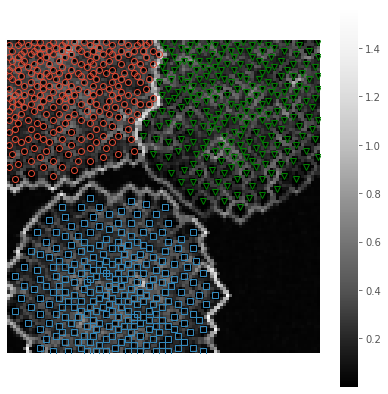

In [0]:
plt.figure(figsize=(7,7))
for actual_class, cluster_index in zip(dataSc[8][1], clusters_1):
  cluster_y, cluster_x = divmod(cluster_index, GRID_HEIGHT)
  parameters = class_parameters[actual_class]

  plt.plot(cluster_x, cluster_y, **parameters)

weight = sofm_1.weight.reshape((sofm_1.n_inputs, GRID_HEIGHT, GRID_WIDTH))
heatmap = compute_heatmap(weight)
mappabl = plt.imshow(heatmap, cmap='Greys_r', interpolation='nearest')
plt.colorbar()

plt.axis('off')
plt.show()

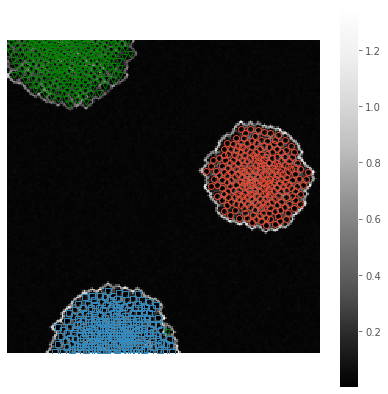

In [0]:
#using even larger grid, and even longer training
GRID_HEIGHT = 200
GRID_WIDTH =200

sofm_2 = algorithms.SOFM(
            n_inputs=5,
            features_grid=(GRID_HEIGHT,GRID_WIDTH),
            learning_radius=5,
            reduce_radius_after=50,
            step=0.25,
            shuffle_data=True,
            verbose=False,)
sofm_2.train(dataSc[8][0], epochs=300)
clusters_2 = sofm_2.predict(dataSc[8][0]).argmax(axis=1)

plt.figure(figsize=(7,7))
for actual_class, cluster_index in zip(dataSc[8][1], clusters_2):
  cluster_y, cluster_x = divmod(cluster_index, GRID_HEIGHT)
  parameters = class_parameters[actual_class]
  plt.plot(cluster_x, cluster_y, **parameters)

weight = sofm_2.weight.reshape((sofm_2.n_inputs, GRID_HEIGHT, GRID_WIDTH))
heatmap = compute_heatmap(weight)
mappabl = plt.imshow(heatmap, cmap='Greys_r', interpolation='nearest')
plt.colorbar()

plt.axis('off')
plt.show()

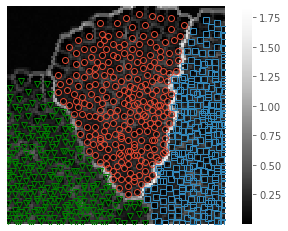

In [0]:
#using different gridtype (hexagon instead of rectangle), the rest same as sofm_1
GRID_HEIGHT = 100
GRID_WIDTH =100

sofm_3 = algorithms.SOFM(
            n_inputs=5,
            features_grid=(GRID_HEIGHT,GRID_WIDTH),
            learning_radius=5,
            reduce_radius_after=50,
            step=0.25,
            grid_type='hexagon',
            shuffle_data=True,
            verbose=False,)
sofm_3.train(dataSc[8][0], epochs=300)
clusters_3 = sofm_3.predict(dataSc[8][0]).argmax(axis=1)

for actual_class, cluster_index in zip(dataSc[8][1], clusters_3):
  cluster_y, cluster_x = divmod(cluster_index, GRID_HEIGHT)
  parameters = class_parameters[actual_class]
  plt.plot(cluster_x, cluster_y, **parameters)

weight = sofm_3.weight.reshape((sofm_3.n_inputs, GRID_HEIGHT, GRID_WIDTH))
heatmap = compute_heatmap(weight, hexagongrid=True)
mappabl = plt.imshow(heatmap, cmap='Greys_r', interpolation='nearest')
plt.colorbar()

plt.axis('off')
plt.show()


In [0]:
# I am not sure how to "extract and evaluate the SOFM clusters"
# In my view that requires creating decision boundaries
# so that is what I did. using kmeans clustering
# for the discussion: we now not only evaluate the sofm performance, but also the kmeans performance
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

truth = dataSc[8][1]

for i, clusters in enumerate([clusters_1, clusters_2, clusters_3]):

  cluster_y, cluster_x = divmod(clusters, 200 if i == 1 else 100)
  X = np.column_stack((cluster_x, cluster_y))
  predicted = KMeans(n_clusters=3).fit(X).labels_

  print("adjusted rand score using sofm_{} = {}".format(i+1, adjusted_rand_score(predicted, truth)))
  print("silhouette_score using sofm_{} = {}".format(i+1, silhouette_score(X, predicted, metric='euclidean')))

adjusted rand score using sofm_1 = 0.9880400964062737
silhouette_score using sofm_1 = 0.550249371979215
adjusted rand score using sofm_2 = 0.9959973226738635
silhouette_score using sofm_2 = 0.8090667712542513
adjusted rand score using sofm_3 = 0.4357029496185863
silhouette_score using sofm_3 = 0.41498400828314863


In [0]:
#----------------------Using real-life data set------------------------#

# The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
# the experiment. 
# 1. area A,
# 2. perimeter P,
# 3. compactness C = 4*pi*A/P^2,
# 4. length of kernel,
# 5. width of kernel,
# 6. asymmetry coefficient
# 7. length of kernel groove.
# All of these parameters were real-valued continuous.

df = pd.read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt",
                   error_bad_lines=False, header=None) # some formatting mistakes in the dataset
df.shape

b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


(199, 8)

In [0]:
import pandas_profiling as pp
pp.ProfileReport(df)

# No missing values
# 7 attributes, 199 observations
# last column are cluster labels

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [0]:
X = df.iloc[:,:7]
y = df.iloc[:,7]

XSc = StandardScaler().fit_transform(X.values)

GRID_HEIGHT = 200
GRID_WIDTH =200

sofm = algorithms.SOFM(
            n_inputs=7,
            features_grid=(GRID_HEIGHT,GRID_WIDTH),
            learning_radius=5,
            reduce_radius_after=50,
            step=0.25,
            shuffle_data=True,
            verbose=False,)
sofm.train(XSc, epochs=300)
clusters = sofm.predict(XSc).argmax(axis=1)

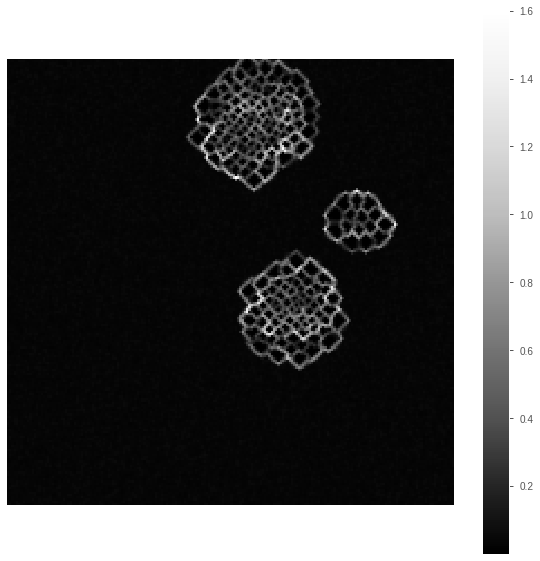

In [0]:
plt.figure(figsize=(10,10))
weight = sofm.weight.reshape((sofm.n_inputs, GRID_HEIGHT, GRID_WIDTH))
heatmap = compute_heatmap(weight)
mappabl = plt.imshow(heatmap, cmap='Greys_r', interpolation='nearest')
plt.colorbar()
plt.axis('off')
plt.show()

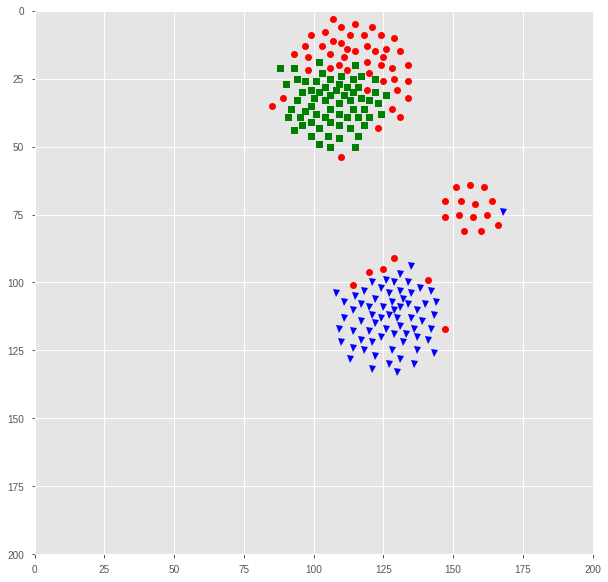

In [0]:
class_parameters2 = [dict(marker='o',c='r',),dict(marker='v',c='b',),dict(marker='s',c='g',)]
plt.figure(figsize=(10,10))
for actual_class, cluster_index in zip(y, clusters):
  cluster_y, cluster_x = divmod(cluster_index, GRID_HEIGHT)
  parameters = class_parameters2[(actual_class - 1) ]
  plt.plot(cluster_x, cluster_y, **parameters)
plt.xlim(0,200)
plt.ylim(200,0)
plt.show()

In [0]:
cluster_y, cluster_x = divmod(clusters, GRID_HEIGHT)
Xsofm = np.column_stack((cluster_x, cluster_y))
predicted = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(Xsofm).labels_

print("adjusted rand score = {}".format(adjusted_rand_score(predicted, y)))
print("silhouette_score = {}".format(silhouette_score(X, predicted, metric='euclidean')))

adjusted rand score = 0.5290551836350961
silhouette_score = 0.29631159277748825


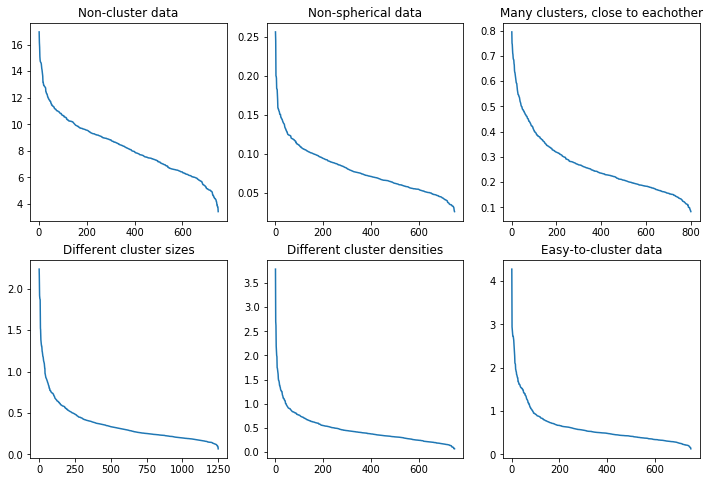


Dataset 1:
Estimated number of clusters: 1
Estimated number of noise points: 4
Homogeneity: 1.000
Completeness: -0.000
Adjusted Rand Index: 0.000

Dataset 2:
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
Adjusted Rand Index: 0.000

Dataset 3:
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: -0.000
Completeness: 1.000
Adjusted Rand Index: 0.000

Dataset 4:
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: -0.000
Completeness: 1.000
Adjusted Rand Index: 0.000

Dataset 5:
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: -0.000
Completeness: 1.000
Adjusted Rand Index: 0.000

Dataset 6:
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: -0.000
Completeness: 1.000
Adjusted Rand Index: 0.000


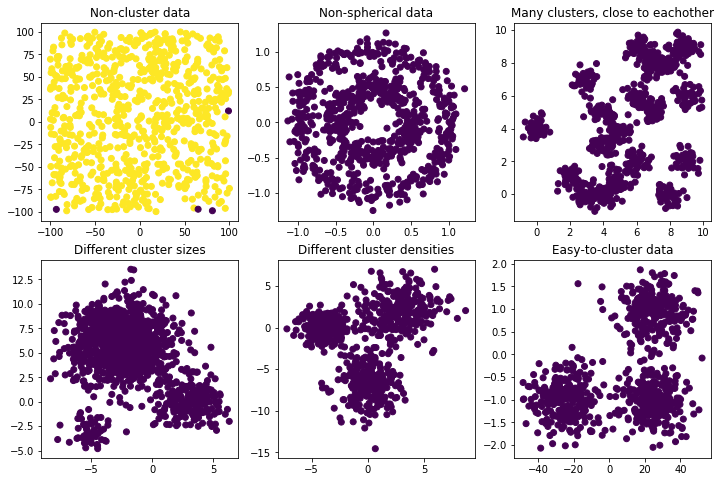

In [6]:
# DBSCAN


 # Some code from: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

%matplotlib inline

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors


# A: plotting 6 first datasets with eps estimated from elbow plots, euclidean, no scaling

#Determining values for eps

fig, ax = plt.subplots(2, 3, figsize=(12,8))

for i, data in enumerate(datasets[:6]):
  npoints=len(data[0])
  nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(data[0]) #includes self
  dist, ind = nbrs.kneighbors(data[0])
  dist=sorted(dist[:,4], reverse=True)
  ax[0 if i < 3 else 1, np.mod(i,3)].plot(list(range(1,npoints+1)),dist)
  ax[0 if i < 3 else 1, np.mod(i,3)].title.set_text(dataDescriptions[i])
plt.show()


#Using DBSCAN

fig, ax = plt.subplots(2, 3, figsize=(12,8))
epsilon=[11,7.25,10.5,13,10,8]  #from elbow plots

for i, data in enumerate(datasets[:6]):
   
  X=data[0]
  labels_true=data[1]

  db = DBSCAN(eps=epsilon[i], min_samples=4, metric='euclidean').fit(X)
  labels = db.fit_predict(X) 

  ax[0 if i < 3 else 1, np.mod(i,3)].scatter(X[:, 0], X[:, 1], c=labels)
  ax[0 if i < 3 else 1, np.mod(i,3)].title.set_text(dataDescriptions[i])

  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
 
  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)
  
  print("")
  print('Dataset '+ str(i+1)+':')
  print('Estimated number of clusters: %d' % n_clusters_)
  print('Estimated number of noise points: %d' % n_noise_)
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels)) # compactness
  print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels)) #entropy
  print("Adjusted Rand Index: %0.3f"
        % metrics.adjusted_rand_score(labels_true, labels))
  if n_clusters_>1:
    print("Silhouette Coefficient: %0.3f"
        % metrics.silhouette_score(X, labels))

plt.show()



# we're getting weird elbow plots. method doesn't seem to work well for the data

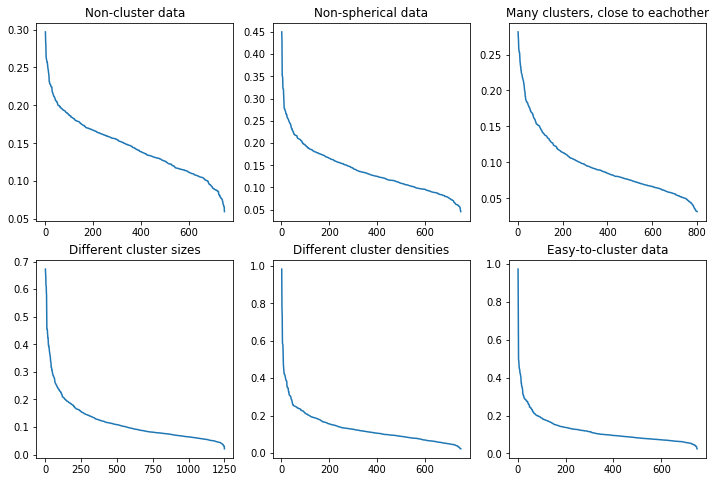


Dataset 1:
Estimated number of clusters: 1
Estimated number of noise points: 3
Homogeneity: 1.000
Completeness: 0.000
Adjusted Rand Index: 0.000

Dataset 2:
Estimated number of clusters: 1
Estimated number of noise points: 18
Homogeneity: 0.012
Completeness: 0.075
Adjusted Rand Index: 0.001

Dataset 3:
Estimated number of clusters: 13
Estimated number of noise points: 62
Homogeneity: 0.640
Completeness: 0.856
Adjusted Rand Index: 0.401
Silhouette Coefficient: 0.314

Dataset 4:
Estimated number of clusters: 6
Estimated number of noise points: 62
Homogeneity: 0.265
Completeness: 0.335
Adjusted Rand Index: 0.247
Silhouette Coefficient: -0.194

Dataset 5:
Estimated number of clusters: 2
Estimated number of noise points: 20
Homogeneity: 0.012
Completeness: 0.079
Adjusted Rand Index: 0.001
Silhouette Coefficient: 0.010

Dataset 6:
Estimated number of clusters: 7
Estimated number of noise points: 35
Homogeneity: 0.932
Completeness: 0.756
Adjusted Rand Index: 0.885
Silhouette Coefficient: 0.2

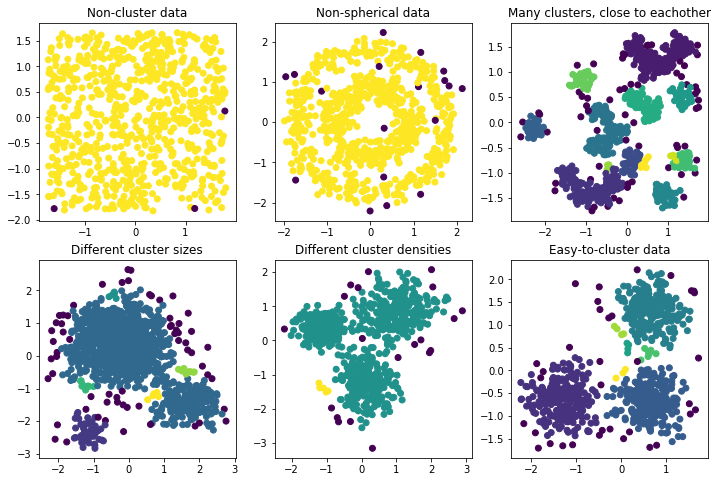

In [7]:
# B: Euclidean metric and data scaling

from sklearn import preprocessing

# elbow plots

fig, ax = plt.subplots(2, 3, figsize=(12,8))

dataSc = [(StandardScaler().fit_transform(data[0]),
          data[1]) for data in datasets ]

for i, data in enumerate(dataSc[:6]):

  X=data[0]
  npoints=len(X)
  nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(X) #includes self
  dist, ind = nbrs.kneighbors(X)
  dist=sorted(dist[:,4], reverse=True)
  ax[0 if i < 3 else 1, np.mod(i,3)].plot(list(range(1,npoints+1)),dist)
  ax[0 if i < 3 else 1, np.mod(i,3)].title.set_text(dataDescriptions[i])
plt.show()

#Using DBSCAN

fig, ax = plt.subplots(2, 3, figsize=(12,8))
epsilonSc=[0.2,0.2,0.12,0.2,0.25,0.2] #from elbow plots

for i, data in enumerate(dataSc[:6]):

  X=data[0]
  labels_true=data[1]
  db = DBSCAN(eps=epsilonSc[i], min_samples=4, metric='euclidean').fit(X)
  labels = db.fit_predict(X) 
  
  ax[0 if i < 3 else 1, np.mod(i,3)].scatter(X[:, 0], X[:, 1], c=labels)
  ax[0 if i < 3 else 1, np.mod(i,3)].title.set_text(dataDescriptions[i])

  
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
 
  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)
 

  print('')
  print('Dataset '+ str(i+1)+':')
  print('Estimated number of clusters: %d' % n_clusters_)
  print('Estimated number of noise points: %d' % n_noise_)
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels)) # compactness
  print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels)) #entropy
  print("Adjusted Rand Index: %0.3f"
        % metrics.adjusted_rand_score(labels_true, labels))
  if n_clusters_>1:
    print("Silhouette Coefficient: %0.3f"
        % metrics.silhouette_score(X, labels))

plt.show()





Dataset 1, manhattan:
Estimated number of clusters: 19
Estimated number of noise points: 46
Homogeneity: 1.000
Completeness: -0.000
Adjusted Rand Index: 0.000
Silhouette Coefficient: -0.274

Dataset 1, chebyshev:
Estimated number of clusters: 1
Estimated number of noise points: 1
Homogeneity: 1.000
Completeness: 0.000
Adjusted Rand Index: 0.000

Dataset 2, manhattan:
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
Adjusted Rand Index: 0.000

Dataset 2, chebyshev:
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
Adjusted Rand Index: 0.000

Dataset 3, manhattan:
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: -0.000
Completeness: 1.000
Adjusted Rand Index: 0.000

Dataset 3, chebyshev:
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: -0.000
Completeness: 1.000
Adjusted Rand Index: 0.000

Dataset 4, manhattan:

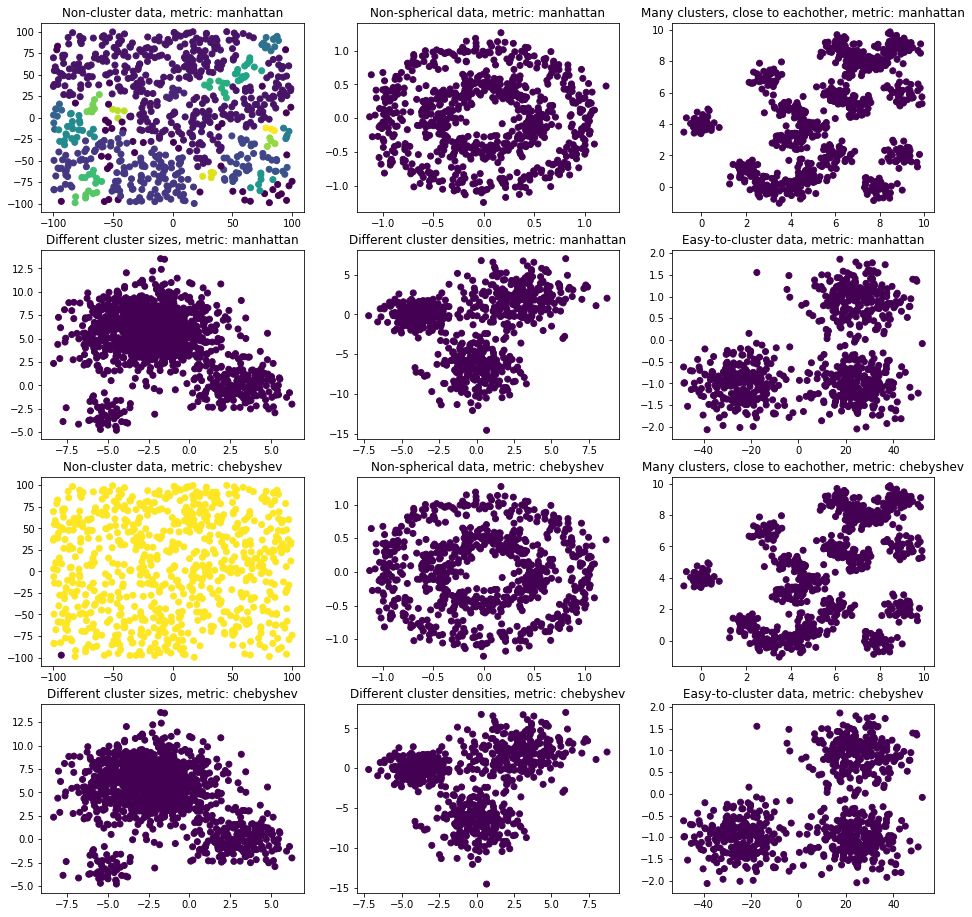

In [8]:
# C other metrics, no scaling

# metrics: manhattan, chebyshev

fig, ax = plt.subplots(4,3, figsize=(16,16))
epsilon=[11,7.25,10.5,13,10,8]

for i, data in enumerate(datasets[:6]):
   
  X=data[0]
  labels_true=data[1]
  db = DBSCAN(eps=epsilon[i], min_samples=4, metric='manhattan').fit(X)
  labels = db.fit_predict(X) 

  ax[0 if i < 3 else 1, np.mod(i,3)].scatter(X[:, 0], X[:, 1],c=labels)
  ax[0 if i < 3 else 1, np.mod(i,3)].title.set_text(dataDescriptions[i]+ ", metric: manhattan")

  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
 
  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)
 
  print('')
  print('Dataset '+ str(i+1)+', manhattan:')
  print('Estimated number of clusters: %d' % n_clusters_)
  print('Estimated number of noise points: %d' % n_noise_)
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels)) # compactness
  print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels)) #entropy
  print("Adjusted Rand Index: %0.3f"
        % metrics.adjusted_rand_score(labels_true, labels))
  if n_clusters_>1:
    print("Silhouette Coefficient: %0.3f"
        % metrics.silhouette_score(X, labels))


  db = DBSCAN(eps=epsilon[i], min_samples=4, metric='chebyshev').fit(X)
  labels = db.fit_predict(X) 

  ax[2 if i < 3 else 3, np.mod(i,3)].scatter(X[:, 0], X[:, 1],c=labels)
  ax[2 if i < 3 else 3, np.mod(i,3)].title.set_text(dataDescriptions[i]+ ", metric: chebyshev")

  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
 
  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)
 
 
  print('')
  print('Dataset '+ str(i+1)+', chebyshev:')
  print('Estimated number of clusters: %d' % n_clusters_)
  print('Estimated number of noise points: %d' % n_noise_)
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels)) # compactness
  print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels)) #entropy
  print("Adjusted Rand Index: %0.3f"
        % metrics.adjusted_rand_score(labels_true, labels))
  if n_clusters_>1:
    print("Silhouette Coefficient: %0.3f"
        % metrics.silhouette_score(X, labels))

plt.show()




Dataset 1, manhattan:
Estimated number of clusters: 14
Estimated number of noise points: 33
Homogeneity: 1.000
Completeness: -0.000
Adjusted Rand Index: 0.000
Silhouette Coefficient: -0.313

Dataset 1, chebyshev:
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 1.000
Completeness: 1.000
Adjusted Rand Index: 1.000

Dataset 2, manhattan:
Estimated number of clusters: 13
Estimated number of noise points: 53
Homogeneity: 0.910
Completeness: 0.337
Adjusted Rand Index: 0.519
Silhouette Coefficient: -0.025

Dataset 2, chebyshev:
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
Adjusted Rand Index: 0.000

Dataset 3, manhattan:
Estimated number of clusters: 18
Estimated number of noise points: 114
Homogeneity: 0.637
Completeness: 0.778
Adjusted Rand Index: 0.365
Silhouette Coefficient: 0.188

Dataset 3, chebyshev:
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: -0.000
Comp

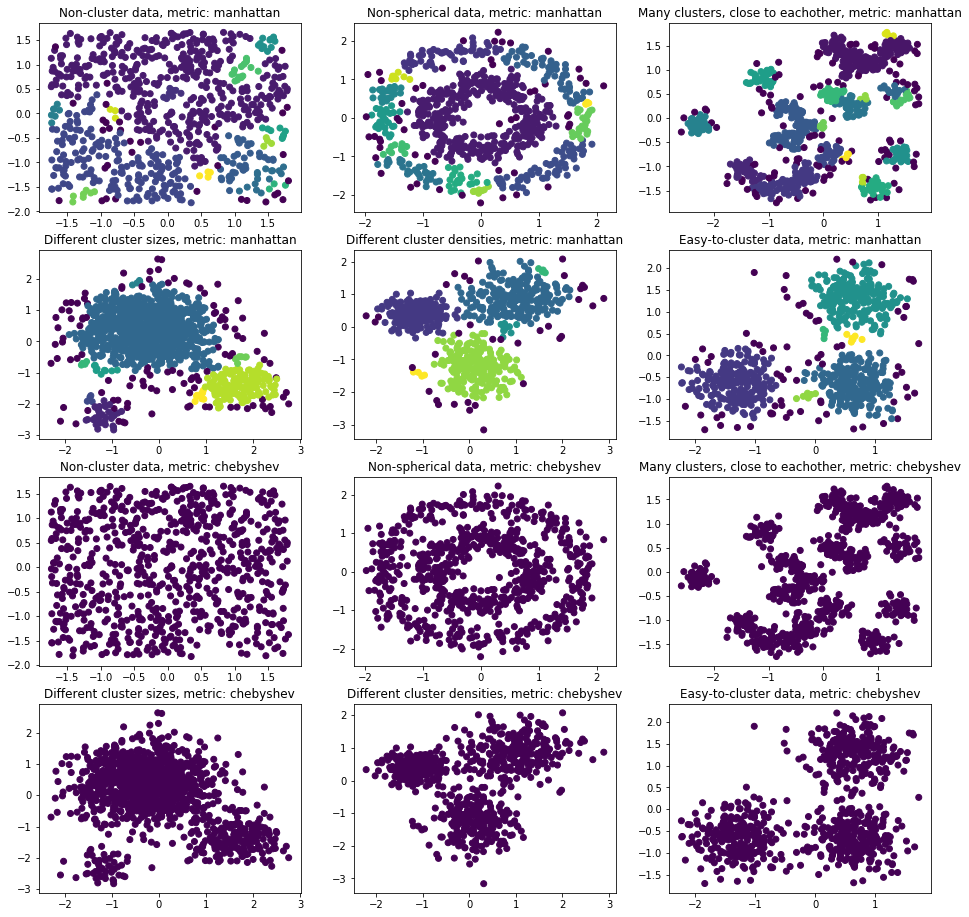

In [9]:
# D: Other metrics and data scaling

# metrics: manhattan, chebyshev

fig, ax = plt.subplots(4,3, figsize=(16,16))

for i, data in enumerate(dataSc[:6]):
   
  X=data[0]
  labels_true=data[1]
  db = DBSCAN(eps=epsilonSc[i], min_samples=4, metric='manhattan').fit(X)
  labels = db.fit_predict(X) 

  ax[0 if i < 3 else 1, np.mod(i,3)].scatter(X[:, 0], X[:, 1],c=labels)
  ax[0 if i < 3 else 1, np.mod(i,3)].title.set_text(dataDescriptions[i] + ", metric: manhattan")

  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
 
  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)

  print('')
  print('Dataset '+ str(i+1)+', manhattan:')
  print('Estimated number of clusters: %d' % n_clusters_)
  print('Estimated number of noise points: %d' % n_noise_)
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels)) # compactness
  print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels)) #entropy
  print("Adjusted Rand Index: %0.3f"
        % metrics.adjusted_rand_score(labels_true, labels))
  if n_clusters_>1:
    print("Silhouette Coefficient: %0.3f"
        % metrics.silhouette_score(X, labels))
    

  db = DBSCAN(eps=epsilon[i], min_samples=4, metric='chebyshev').fit(X)
  labels = db.fit_predict(X) 

  ax[2 if i < 3 else 3, np.mod(i,3)].scatter(X[:, 0], X[:, 1],c=labels)
  ax[2 if i < 3 else 3, np.mod(i,3)].title.set_text(dataDescriptions[i] + ", metric: chebyshev")

  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
 
  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)

  print('')
  print('Dataset '+ str(i+1)+', chebyshev:')
  print('Estimated number of clusters: %d' % n_clusters_)
  print('Estimated number of noise points: %d' % n_noise_)
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels)) # compactness
  print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels)) #entropy
  print("Adjusted Rand Index: %0.3f"
        % metrics.adjusted_rand_score(labels_true, labels))
  if n_clusters_>1:
    print("Silhouette Coefficient: %0.3f"
        % metrics.silhouette_score(X, labels))

plt.show()



Dataset 1:
Estimated number of clusters: 65
Estimated number of noise points: 389
Homogeneity: 1.000
Completeness: 0.000
Adjusted Rand Index: 0.000
Silhouette Coefficient: -0.167

Dataset 2:
Estimated number of clusters: 46
Estimated number of noise points: 317
Homogeneity: 0.614
Completeness: 0.155
Adjusted Rand Index: 0.065
Silhouette Coefficient: -0.122

Dataset 3:
Estimated number of clusters: 2
Estimated number of noise points: 0
Homogeneity: 0.066
Completeness: 1.000
Adjusted Rand Index: 0.011
Silhouette Coefficient: 0.320

Dataset 4:
Estimated number of clusters: 30
Estimated number of noise points: 332
Homogeneity: 0.582
Completeness: 0.216
Adjusted Rand Index: 0.288
Silhouette Coefficient: -0.378

Dataset 5:
Estimated number of clusters: 27
Estimated number of noise points: 257
Homogeneity: 0.681
Completeness: 0.349
Adjusted Rand Index: 0.319
Silhouette Coefficient: -0.077

Dataset 6:
Estimated number of clusters: 17
Estimated number of noise points: 198
Homogeneity: 0.733
Co

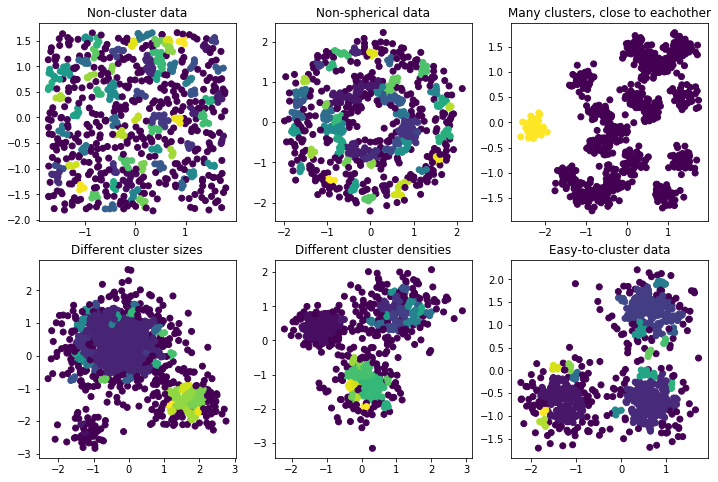

In [25]:
# E bad setting for eps and min_samples


fig, ax = plt.subplots(2, 3, figsize=(12,8))
#epsilonSc=[0.2,0.2,0.12,0.2,0.25,0.2]
eps=[0.1,0.1,0.5,0.1,0.1,0.1]

for i, data in enumerate(dataSc[:6]):

  X=data[0]
  labels_true=data[1]
  db = DBSCAN(eps=eps[i], min_samples=4, metric='euclidean').fit(X)
  labels = db.fit_predict(X) 
  
  ax[0 if i < 3 else 1, np.mod(i,3)].scatter(X[:, 0], X[:, 1], c=labels)
  ax[0 if i < 3 else 1, np.mod(i,3)].title.set_text(dataDescriptions[i])

  
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
 
  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)
 

  print('')
  print('Dataset '+ str(i+1)+':')
  print('Estimated number of clusters: %d' % n_clusters_)
  print('Estimated number of noise points: %d' % n_noise_)
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels)) # compactness
  print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels)) #entropy
  print("Adjusted Rand Index: %0.3f"
        % metrics.adjusted_rand_score(labels_true, labels))
  if n_clusters_>1:
    print("Silhouette Coefficient: %0.3f"
        % metrics.silhouette_score(X, labels))

plt.show()

